Import packages

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load and read CSV

In [15]:
file_path = r'C:\Users\vgrec\Desktop\Coffee Sales\Coffee_Sales.csv'
df = pd.read_csv(file_path)

### **Exploratory Data Analysis (EDA)**

In [16]:
#Dimentions of the data
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1133, and columns are 6.


In [17]:
print(df.size)

6798


In [18]:
#Display the first few rows of data
print("First few rows of data:")
print(df.head())

First few rows of data:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [19]:
#Get information about the dataset
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None


In [20]:
# Basic statistics
print("Basic statistics:")
print(df.describe())
print(df.describe(include=['object']))

Basic statistics:
             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000
              date                 datetime cash_type                 card  \
count         1133                     1133      1133                 1044   
unique         150                     1133         2                  446   
top     2024-07-30  2024-03-01 10:15:50.520      card  ANON-0000-0000-0012   
freq            24                        1      1044                   88   

                coffee_name  
count                  1133  
unique                    8  
top     Americano with Milk  
freq                    268  


In [21]:
# Check the dublicated data
print("The dublicated data:")
print(df.duplicated().sum())

The dublicated data:
0


In [22]:
# Check for missing values
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


### *Conclusions:*
- *The dataset contains 1133 records and 6 columns, with one column being numeric and the remaining columns categorical.*
- *There are no duplicate records in the dataset, which is a positive aspect for further analysis.*
- *89 missing values are present in the 'card' column.*
- *The basic statistics for the 'money' column indicate an average coffee price of approximately 33.11 units with minor deviations.*
- *The 'coffee_name' column shows that 'Americano with Milk' has the highest sales volume.*
- *For further time-based analysis, the date and datetime columns, which are currently of type object, will need to be converted to proper date formats. This conversion will enable more effective time-series analysis and utilization of time-based functionalities.*

Let's examine the transactions where the 'card' value is missing

In [23]:
# Display the unique values in the 'cash_type' column
print("Unique values in 'cash_type' column:")
print(df['cash_type'].unique())

Unique values in 'cash_type' column:
['card' 'cash']


In [24]:
# Count the occurrences of each 'cash_type' value with and without missing 'card' values
cash_type_counts = (
    df.groupby(['cash_type', df['card'].isnull()])
    .size()
    .unstack(fill_value=0)
)
print("Count of 'cash_type' values with and without missing 'card' values:")
print(cash_type_counts)

Count of 'cash_type' values with and without missing 'card' values:
card       False  True 
cash_type              
card        1044      0
cash           0     89


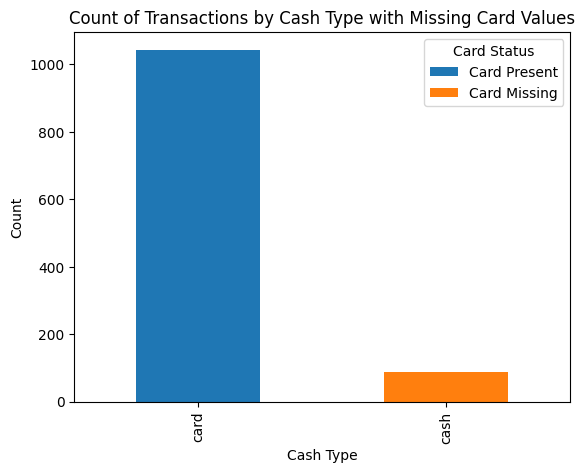

In [25]:
# Visualize the relationship between 'cash_type' and missing 'card' values
cash_type_counts.plot(kind='bar', stacked=True)
plt.xlabel('Cash Type')
plt.ylabel('Count')
plt.title('Count of Transactions by Cash Type with Missing Card Values')
plt.legend(['Card Present', 'Card Missing'], title='Card Status')
plt.show()

*The bar chart visualizes the count of transactions by cash type and the presence or absence of card values. It shows that all transactions recorded as 'card' have a valid card value, while transactions recorded as 'cash' do not have a card value. Missing card values are due to the transaction type rather than data issues. As the card column does not provide additional insights for our analysis, we can consider removing it to simplify the dataset.*